# Build a Simple Linear Regression Model and Make Predictions

In [56]:
#Supress Warnings
#import warnings
#warnings.filterwarnings('ignore')

In [57]:
# Importing naumpy and pandas libraries to read the data

import numpy as np
import pandas as pd

# Steps for Building a Simple Linear Regression Model:                                                             
1 Loading and Understanding the dataset  
2 Visualizing the dataset  
3 Performing Simple Linear Regression (SLR)  
4 Residual Analysis  
5 Predictions on the test dataset

# 1 Loading and Understanding the Dataset

In [28]:

advertising = pd.read_csv("sales_advertisement.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Note: In this dataset, we have three columns as Independent Variables TV, Radio and Newpapers and a Depdenent Variable column "Sales"

In [29]:
# Shape of our dataset
advertising.shape

(200, 4)

In [30]:
# Info our dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
# Describe our dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 2 Visualizing the Dataset

In [32]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

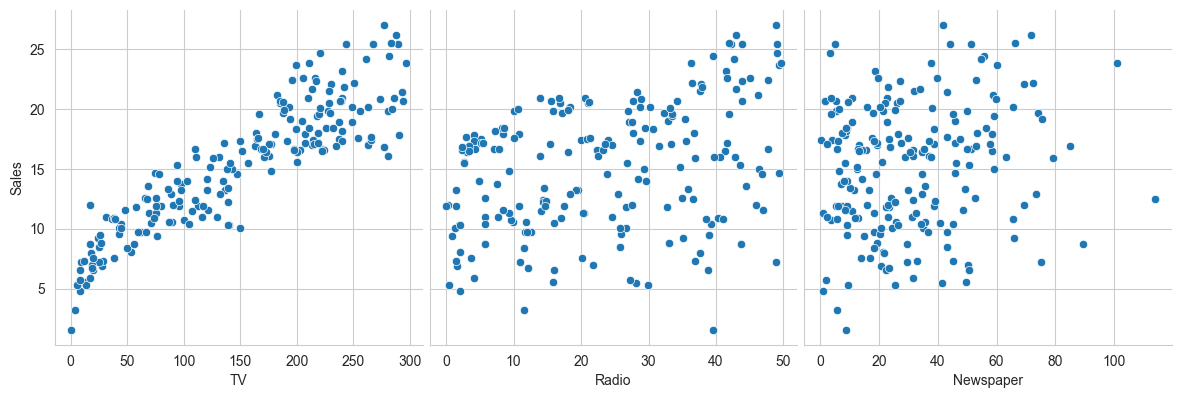

In [33]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

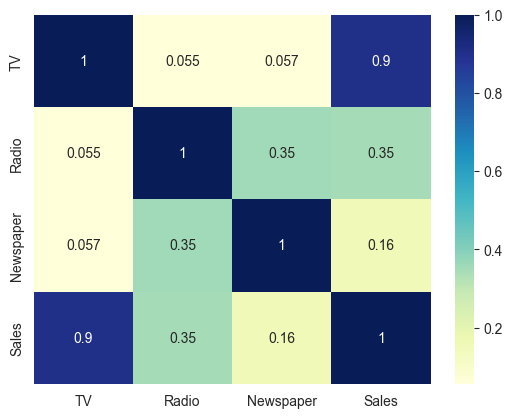

In [34]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# 3 Performing Simple Linear Regression (for "TV" Independent Variable because the TV column seems most correlated to Sales Depdent Variable.)
Equation of simple linear regression: y = mX + b

In our case:
y = m * TV + b

Perform simple linear regression in four steps:
A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)
B) Create/Split Training and Test datasets from the Original Dataset
C) Build/Train the SLR Model
D) Test/Evaluate the SLR Model

# A) Create/Separate X (Independent Variable) and y (Dependent/Target Variable)

In [35]:

# we will assign our Independent Variable/Column TV as X and our Dependent/Target Variable Sales as y.
# X = Independent Variable = TV and y = Dependent/Target Variable = Sales

# Creating X and y
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

# B) Create/Split Training and Test Datasets from the Original Dataset

In [36]:


# Splitting the Varaibles as Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [37]:
# Take a look at the Training Dataset
X_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [38]:
# Take a look at the Test Dataset (which will be used for Evaluation/Prediction)
X_test
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

# C) Build/Train the SLR Model
Using the following two packages, we can build a Simple Linear Regression (SLR) model:
statsmodel 
sklearn

In [39]:
# Building the MLR Model using statsmodels package

# Importing Statsmodels.api library
import statsmodels.api as sm

In [40]:
# Adding a constant to the training data to get an intercept
X_train_sm = sm.add_constant(X_train)

In [41]:
# Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. 
# After that, we will see the parameters, i.e., b and m of the straight line.

# Fitting the regression model using 'OLS' (Ordinary Least Squares)
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the model parameters (intercept and slopes for each independent variable)
lr.params

const        4.334596
TV           0.053829
Radio        0.110012
Newspaper    0.006290
dtype: float64

In [42]:
# Performing a summary to list out all the different parameters of the regression line fitted
# This includes R², probability of F-statistic, and p-values for each coefficient.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           4.73e-71
Time:                        11:40:38   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.000       3.628       5.041
TV             0.0538      0.002     34.539      0.000       0.051       0.057
Radio          0.1100      0.010     10.609      0.000       0.090       0.131
Newspaper      0.0063      0.007      0.902      0.369      -0.008       0.020
==============================================================================
Omnibus:                       18.669   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.643   Prob(JB):                     1.52e-07
Kurtosis:                       4.932   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# D) Summary Analysis of Trained Model
So, the statistics we are mainly concerned with to determine whether the model is viable or not are:

1. The coefficients and its p-value(significance) 
2. R-squared value 
3. F-statistic and its significance

---------------------
1. The p values in regression help determine whether the relationships that you observe in your sample also exist in the larger population. The linear regression p value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable.

1. The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
We have to make sure that the p-value should always be less for the coefficient to be significant


--------------------
2. R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

2. R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.

-------------------
3. f-statistics is a statistic used to test the significance of regression coefficients in linear regression models. f-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error.

3. Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

Sales =  0.054 * TV + 6.948  (y = mX + b)

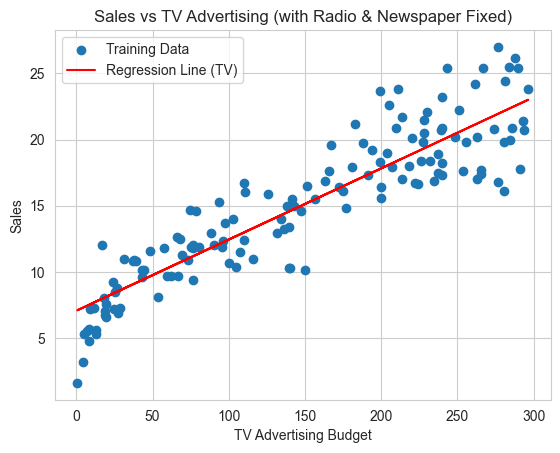

In [43]:
radio_mean = X_train['Radio'].mean()
newspaper_mean = X_train['Newspaper'].mean()

y_train_pred_tv = 4.334596 + 0.053829 * X_train['TV'] + 0.110012 * radio_mean + 0.006290 * newspaper_mean

plt.scatter(X_train['TV'], y_train, label='Training Data')

plt.plot(X_train['TV'], y_train_pred_tv, color='red', label='Regression Line (TV)')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Sales vs TV Advertising (with Radio & Newspaper Fixed)')
plt.legend()
plt.show()

Training Model of Regression is Built
This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.

# 4 Residual Analysis
One of the major assumptions of the linear regression model is the error terms are normally distributed.

Error = Actual y value - y predicted value

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

Now from the dataset, We have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms(Residuals) from the predicted data.

In [45]:
# Predicting y values using the trained MLR model
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train dataset and predicted y values
res = y_train - y_train_pred

/var/folders/16/zl7d3r5d0bn7chmwxr_cr8tm0000gn/T/ipykernel_6956/2389982044.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


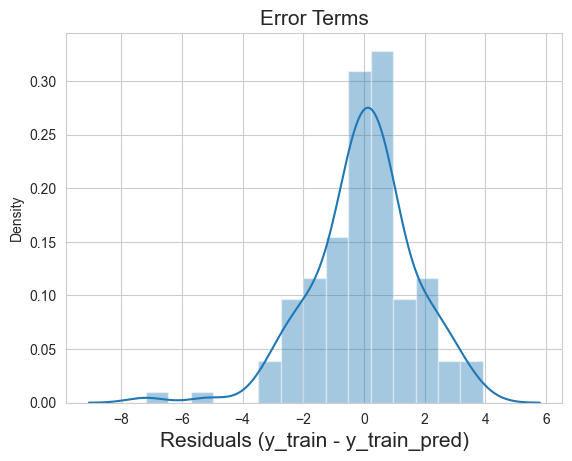

In [46]:
# Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

# Plotting the histogram of the residuals to check for normality
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Residuals (y_train - y_train_pred)', fontsize=15)
plt.show()

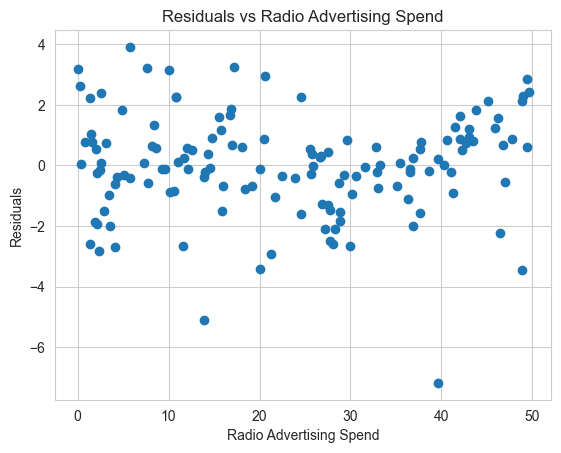

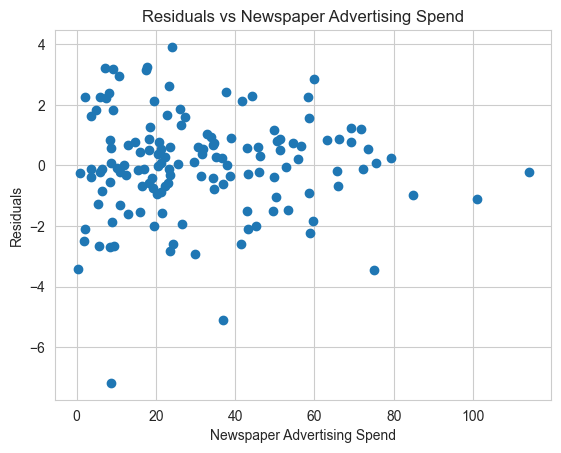

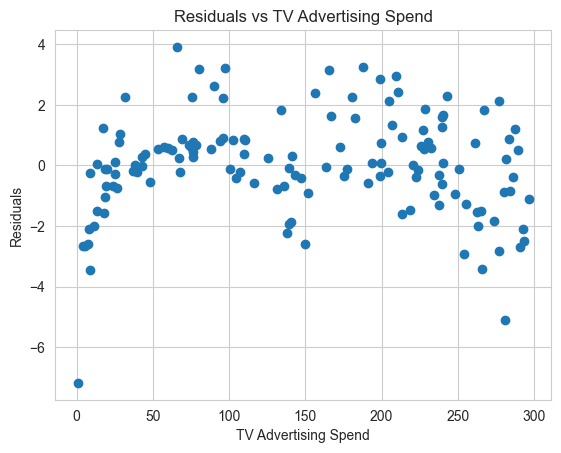

In [47]:
plt.scatter(X_train['Radio'], res)
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Residuals')
plt.title('Residuals vs Radio Advertising Spend')
plt.show()

plt.scatter(X_train['Newspaper'], res)
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Residuals')
plt.title('Residuals vs Newspaper Advertising Spend')
plt.show()

plt.scatter(X_train['TV'], res)
plt.xlabel('TV Advertising Spend')
plt.ylabel('Residuals')
plt.title('Residuals vs TV Advertising Spend')
plt.show()

Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model we have built to evaluate test data.

# 5 Test/Evaluate the SLR Model/Predictions on the Test data

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. 
Similar to the training dataset, we have to add_constant to the test data and predict the y values using the predict attribute present in the statsmodel.

In [48]:
# Adding a constant to X_test for MLR
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm using the MLR model
y_test_pred = lr.predict(X_test_sm)

# Printing the predicted values
y_test_pred

126     9.352211
104    20.963446
99     16.488511
92     20.109710
111    21.671484
167    16.160544
116    13.561806
96     15.393381
52     20.819808
69     21.005371
164    12.294513
124    20.708486
182     8.173673
154    16.824715
125    10.489548
196     9.995306
194    16.346989
177    14.575812
163    17.230651
31     12.568907
11     18.557159
73     12.124028
15     20.433126
41     17.780178
97     16.736234
128    21.603876
133    20.135321
82     10.825600
139    19.127828
123    14.845378
83     13.135974
65      9.077579
151    12.078341
162    16.628244
170     8.417928
77     14.045670
32      9.920502
173    14.261016
174    16.762630
85     17.171855
168    18.887976
112    15.501655
171    15.786884
181    16.862667
7      13.034058
46     10.476739
75     10.614164
28     20.852650
29     10.151757
195     6.884714
40     17.887026
153    18.160139
115    12.559071
64     16.281896
59     18.980247
1      11.337149
192     5.910269
136    10.061595
152    17.6238

In [49]:
# Calculate the R² value for the above-predicted y-values.
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8655979373420265

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

The scatter-plot with best-fit line looks like, This is how we build a linear regression model using the "statsmodel" package.

# Method 2: Simple Linear Regression Model Using sklearn package/library

Apart from the statsmodel, we can build a linear regression model using sklearn. Using the linear_model library from sklearn, we can make the model.

Similar to statsmodel, we’ll split the data into train and test.

In [50]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split

# Assuming X contains multiple independent variables (TV, Radio, Newspaper) and y is the dependent variable (Sales)
# Splitting the data into Training and Testing Datasets
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
# For simple linear regression, we need to add a column to perform the regression fit properly.

# Shape of the train set without adding column
print(X_train_lm.shape)

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,3)
X_test_lm = X_test_lm.values.reshape(-1,3)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 3)
(140, 3)
(60, 3)


In [52]:
# Now, let’s fit the line to the plot importing the LinearRegression library from the sklearn.linear_model.

from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [53]:
# Now, let’s find the Coefficients (Intercept and Slope) of the model.

# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 4.334595861728433
Slope : [0.05382911 0.11001224 0.00628995]


The straight-line equation we get for the above values is, Sales =  0.054 * TV + 6.948 
If we observe, the equation we got here is the same as the one we got in the statsmodel.

# 5 Prediction and Evaluation
After that, we’ll make the predictions and on the data and evaluate the model by comparing the R² values.

In [54]:
# Prediction of y_value using the trained MLR Model
y_train_pred = lm.predict(X_train_lm)  # Predictions on training set
y_test_pred = lm.predict(X_test_lm)    # Predictions on test set

In [55]:
# Comparing the R² value for both train and test data
print(r2_score(y_train_lm, y_train_pred))
print(r2_score(y_test_lm, y_test_pred))

0.91049938193816
0.8655979373420272


The R² values of the train and test data are R² train_data = 0.816 R² test_data = 0.792

Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

Conclusion As we have seen, we can build a linear regression model using either a statsmodel or sklearn.

We have to make sure to follow these five steps to build the simple linear regression model:

Reading and understanding the data 
Visualizing the data 
Performing simple linear regression 
Residual analysis 
Predictions on the test set

Next is Multiple Linear Regression (MLR) Model